<a href="https://colab.research.google.com/github/LeeviMakinen/Final_Work_Makinen/blob/main/Final_Work_Makinen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00


Käytä oikeaa polkua ja tarkista tiedoston nimi. Koodi toimii aina jos polku, nimi ja sheetin nimi on oikein. Sheet vaatii toki speksien mukaisen raakadatan.

In [ ]:
import pandas as pd

df = pd.read_excel('/content/Final_work_Makinen.xlsx', sheet_name='Raw Data')


In [ ]:
import pandas as pd

descriptive_stats = df.describe(include='all')# Store the formed dataframe in a separate sheet
with pd.ExcelWriter('Final_work_Makinen.xlsx', mode='a', if_sheet_exists='replace') as writer:  # Change mode to 'replace' existing sheet
    descriptive_stats.to_excel(writer, sheet_name='Statistics')

In [ ]:
import pandas as pd

# Generate descriptive statistics
df.describe(include='all')


Name         City Country   Sex         Age    Product  \
count                287          287     287   287  287.000000        287   
unique               100          100      85     2         NaN          5   
top     Jonathon Johnson  Jessicaview   Malta  Male         NaN  Product A   
freq                   5            5      12   155         NaN         63   
mean                 NaN          NaN     NaN   NaN   49.996516        NaN   
min                  NaN          NaN     NaN   NaN   19.000000        NaN   
25%                  NaN          NaN     NaN   NaN   36.000000        NaN   
50%                  NaN          NaN     NaN   NaN   50.000000        NaN   
75%                  NaN          NaN     NaN   NaN   61.500000        NaN   
max                  NaN          NaN     NaN   NaN   80.000000        NaN   
std                  NaN          NaN     NaN   NaN   16.912051        NaN   

                                                 Feedback    NetRevenue  \
count                                                 287    287.000000   
unique                                                287           NaN   
top     Team brother life number southern face floor. ...           NaN   
freq                                                    1           NaN   
mean                                                  NaN   5823.979094   
min                                                   NaN    127.000000   
25%                                                   NaN   2781.500000   
50%                                                   NaN   5064.000000   
75%                                                   NaN   7644.500000   
max                                                   NaN  44348.000000   
std                                                   NaN   5323.153362   

                                 Date  
count                             287  
unique                            NaN  
top                               NaN  
freq                              NaN  
mean    2024-05-19 10:42:13.797909504  
min               2024-01-01 00:00:00  
25%               2024-03-09 12:00:00  
50%               2024-05-17 00:00:00  
75%               2024-07-28 00:00:00  
max               2024-10-07 00:00:00  
std                               NaN

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
descriptive_stats = df.describe(include='all')

# Store the descriptive statistics in a separate sheet named 'Statistics', overwriting if it exists
with pd.ExcelWriter('Final_work_Makinen.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    descriptive_stats.to_excel(writer, sheet_name='Statistics')

print("Descriptive statistics saved to 'Final_work_Makinen.xlsx' sheet 'Statistics'")

Descriptive statistics saved to 'Final_work_Makinen.xlsx' sheet 'Statistics'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


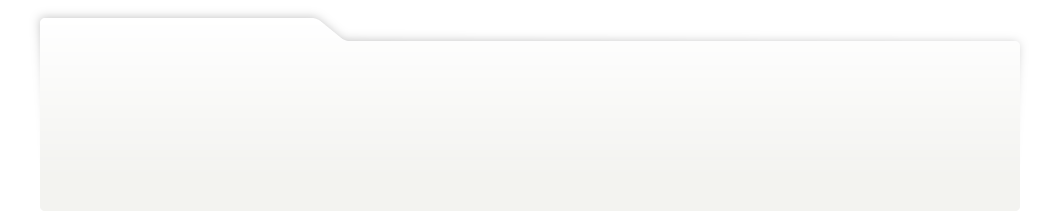
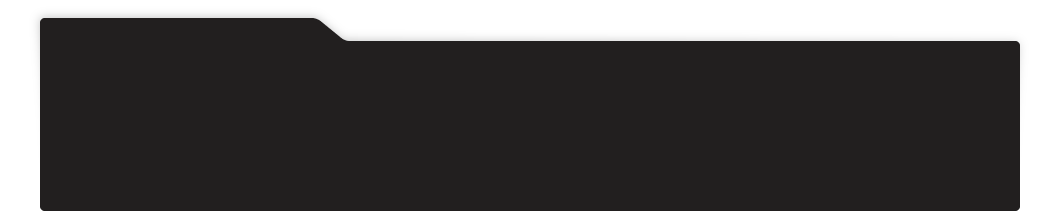
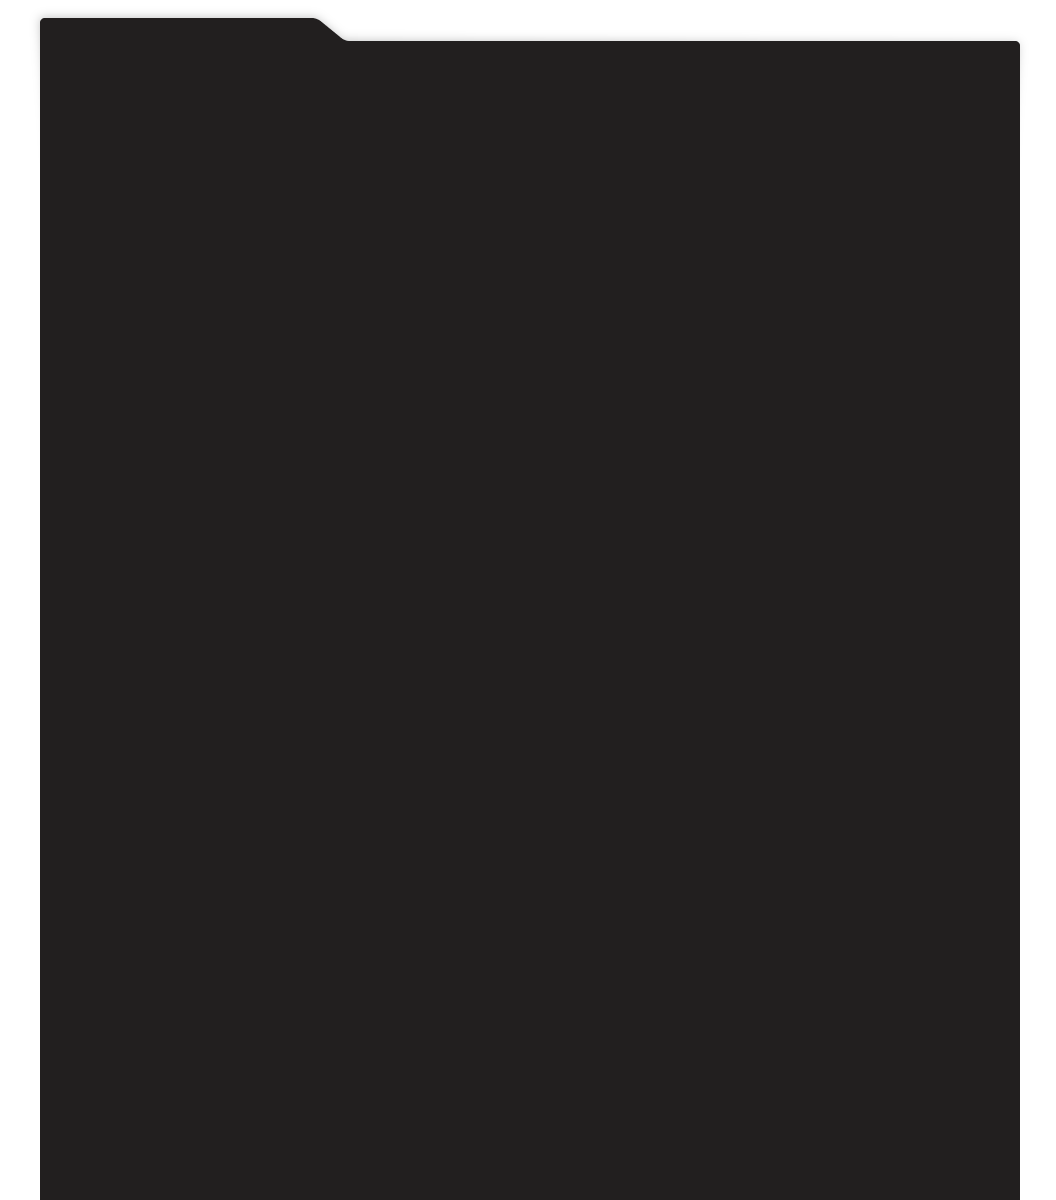
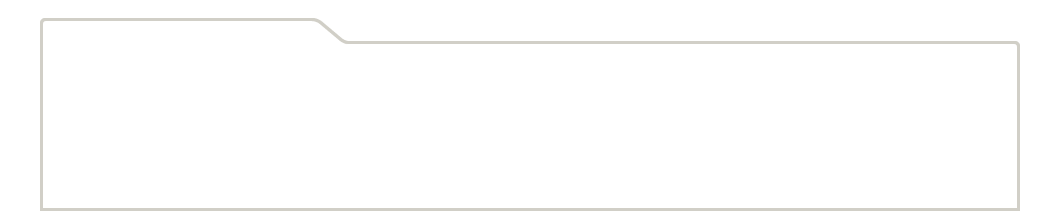
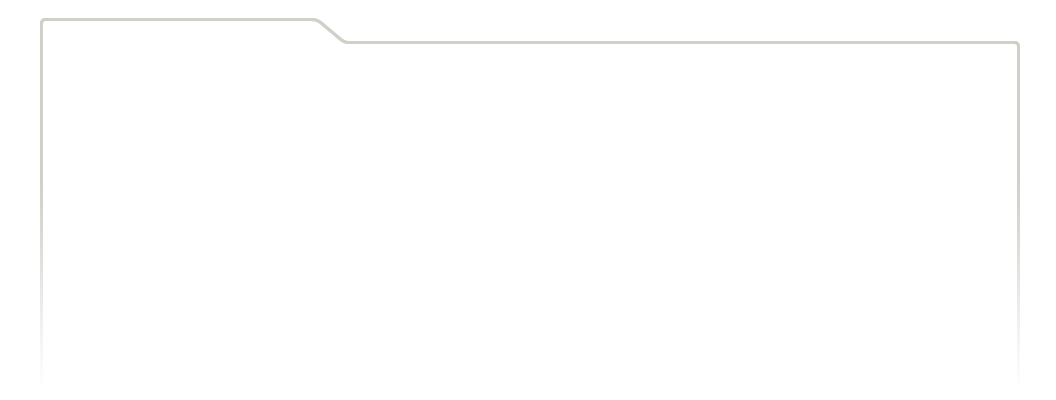
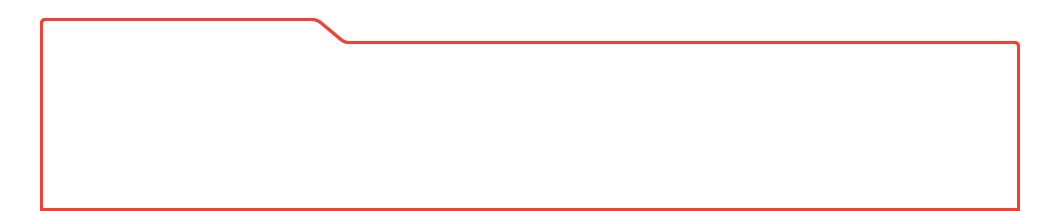
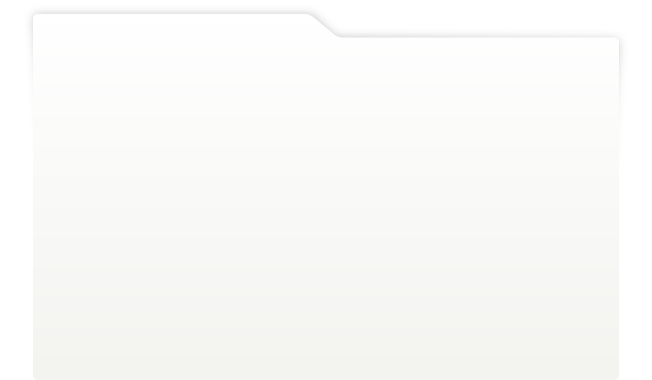
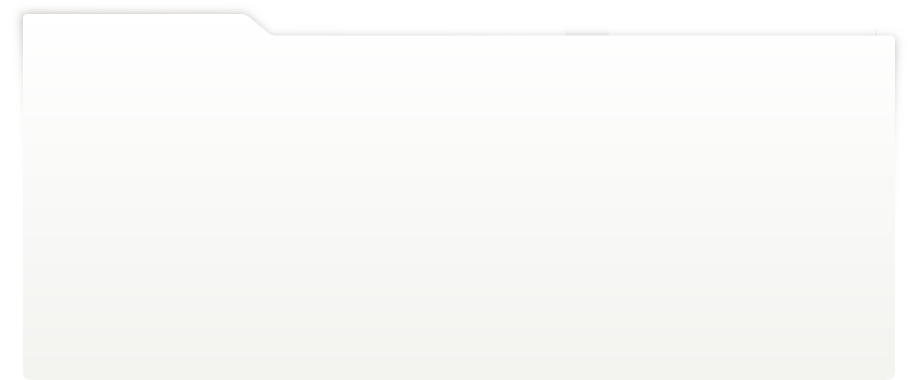
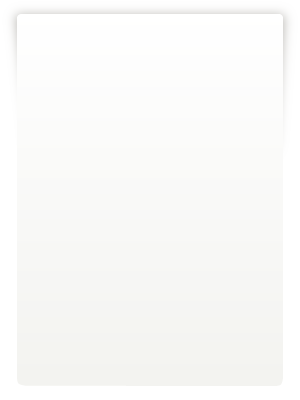
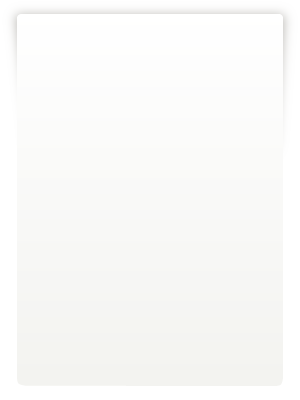
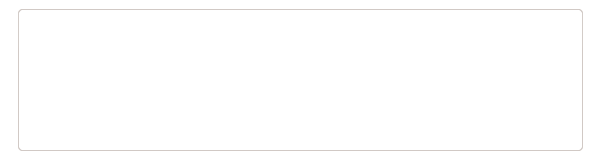
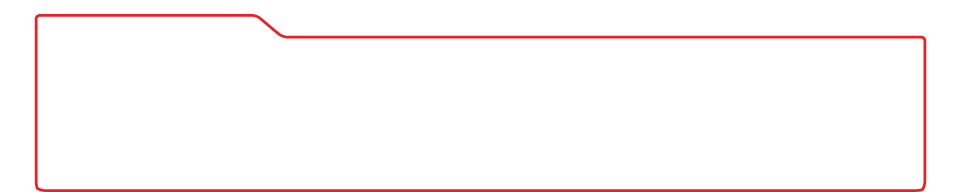
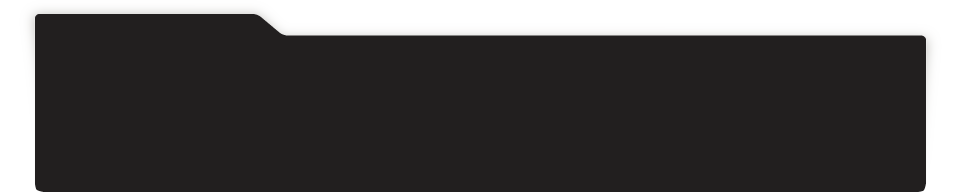
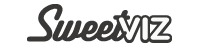
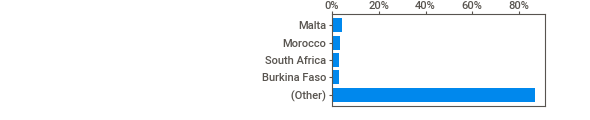
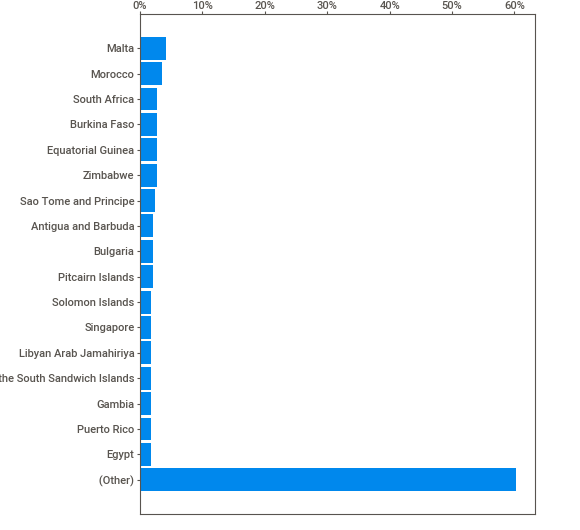
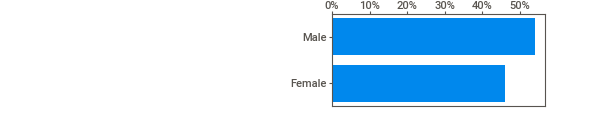
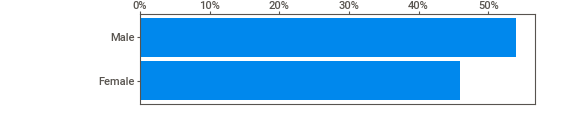
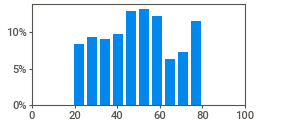
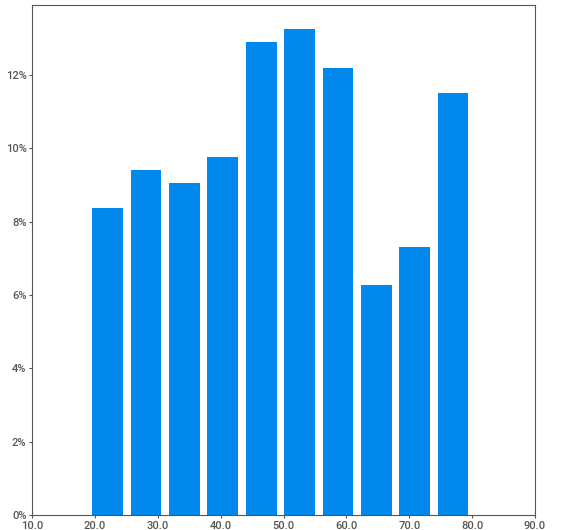
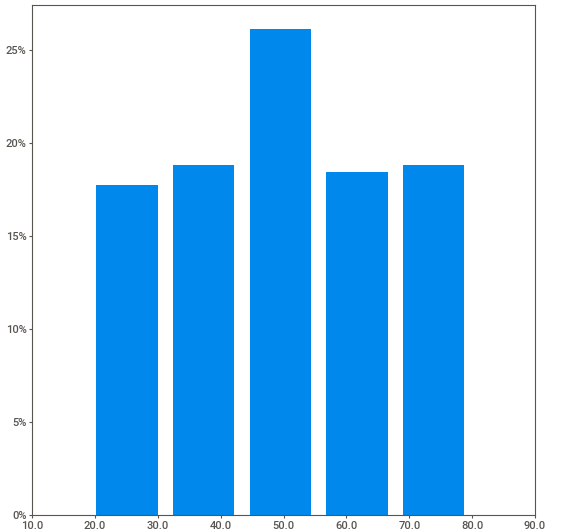
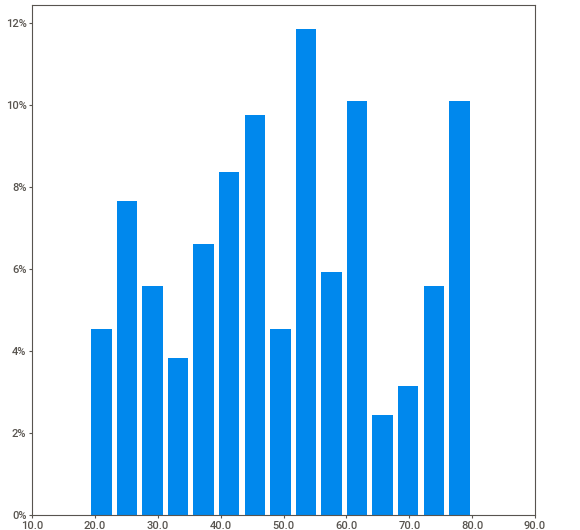
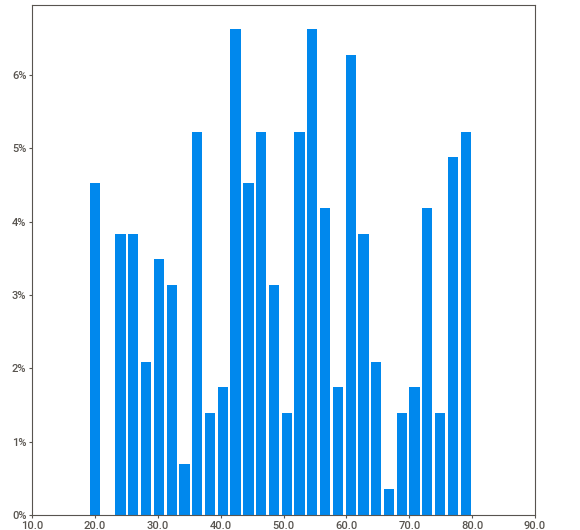
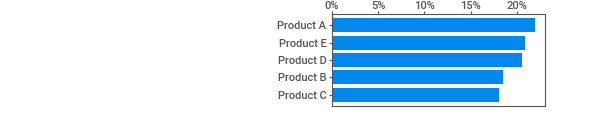
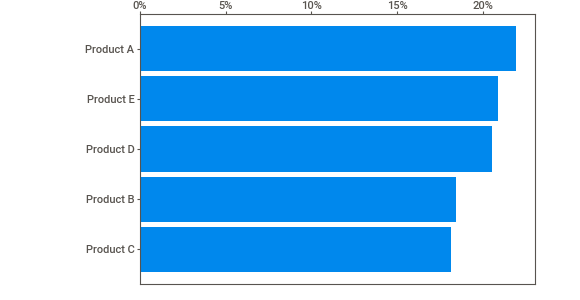
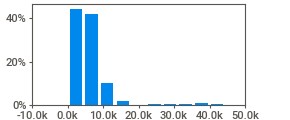
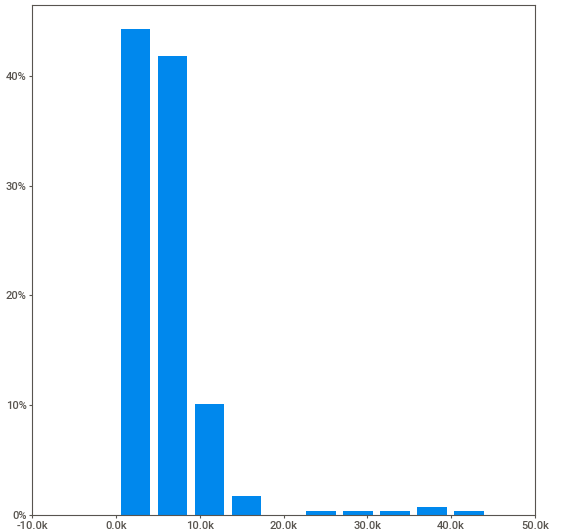
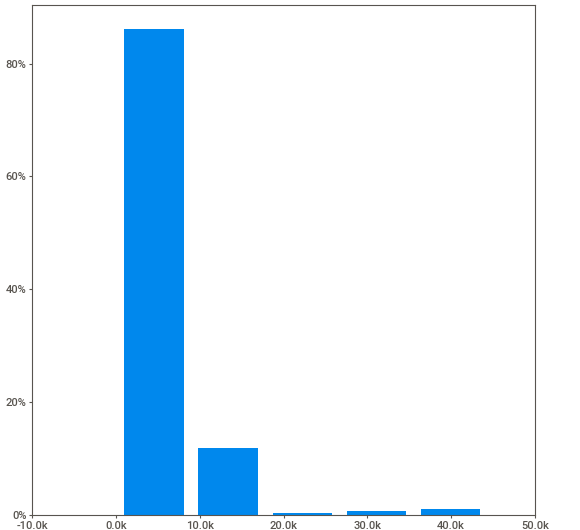
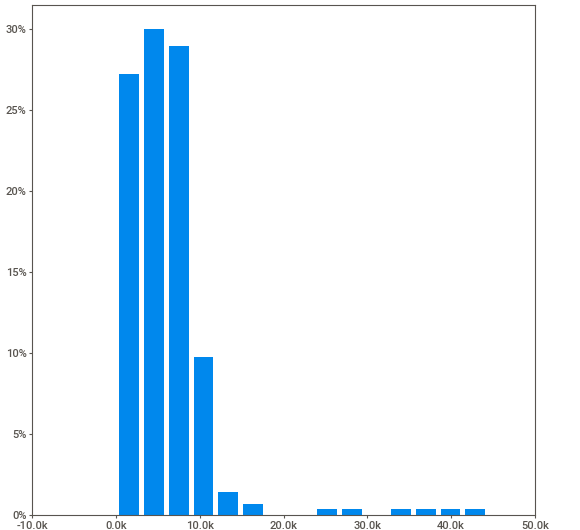
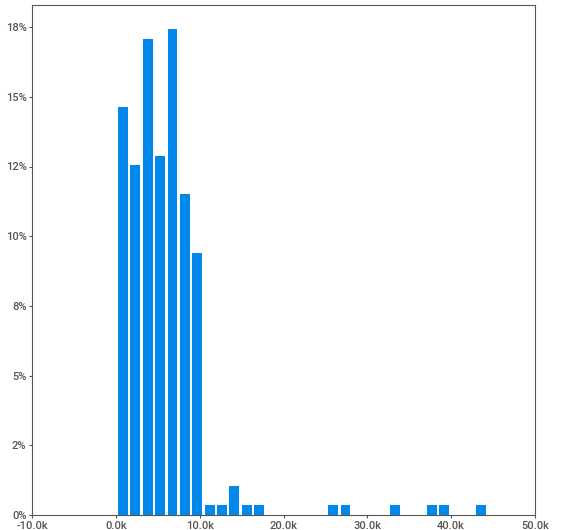
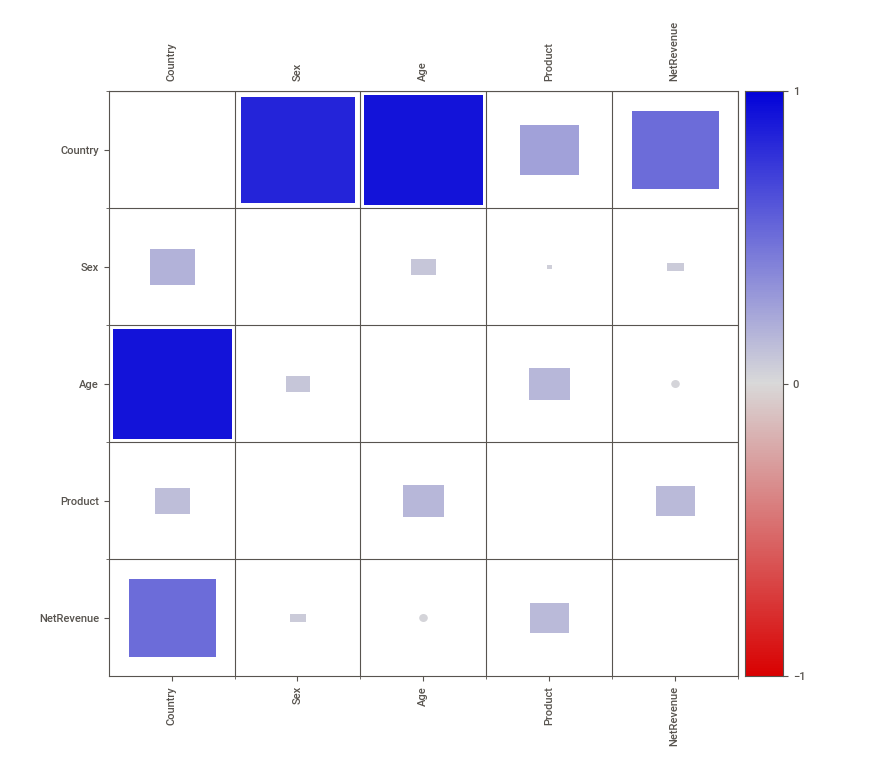
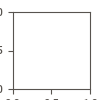

In [ ]:
# 1. Import necessary libraries
!pip install sweetviz
import sweetviz as sv
import pandas as pd
import numpy as np

# 2. Load data from Excel file
df = pd.read_excel('Final_work_Makinen.xlsx', sheet_name='Raw Data')

# 3. Analyze the data using Sweetviz and display in the notebook
report = sv.analyze(df)
report.show_notebook()

# 4. Uncomment this line to generate the Sweetviz HTML report, if needed
# report.show_html('sweetviz_report.html')

# 5. Extract only the numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# 6. Calculate the correlation matrix
association_data = numerical_df.corr()

# 7. Save the correlation matrix to the 'Associations' sheet in the same Excel file
#with pd.ExcelWriter('Final_work_Makinen.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
#    association_data.to_excel(writer, sheet_name='Associations', index=True)

#print("Association data (correlation matrix) saved to 'Final_work_Makinen.xlsx' in the 'Associations' sheet.")

# No need to do this since it was ok to just copy paste the picture of the matrix


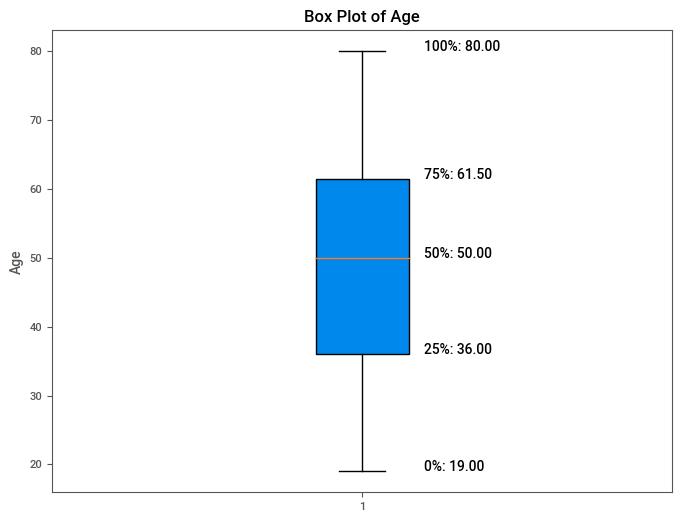

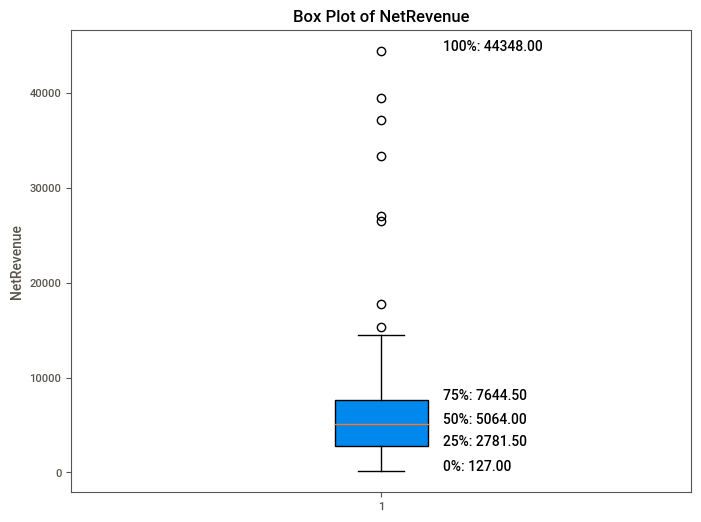

Outliers written to 'Final_work_Makinen.xlsx' sheet 'Outliers'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats # Import the 'stats' module from SciPy

# Iterate through numerical columns for box plots
for column in df.select_dtypes(include=np.number).columns:
    percentiles = [0, 25, 50, 75, 100]
    percentile_values = np.percentile(df[column], percentiles)

    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column], vert=True, patch_artist=True)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

    for i, percentile in enumerate(percentiles):
        plt.text(1.1, percentile_values[i], f'{percentile}%: {percentile_values[i]:.2f}')

    plt.show()

# Calculate the IQR for Net Revenue
Q1 = df['NetRevenue'].quantile(0.25)
Q3 = df['NetRevenue'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the IQR method
outliers_IQR = df[(df['NetRevenue'] < lower_bound) | (df['NetRevenue'] > upper_bound)]
df['Outlier_IQR'] = np.where(df.index.isin(outliers_IQR.index), 'outlier', 'not outlier')

# Calculate the z-scores for 'Net Revenue'
df['Z-Score'] = stats.zscore(df['NetRevenue'])  # Calculate Z-Score
threshold = 3  # Define threshold for Z-Score outliers
df['Outlier_Zscore'] = np.where(np.abs(df['Z-Score']) > threshold, 'outlier', 'not outlier')  # Mark Z-Score outliers

# Calculate the absolute z-scores using SciPy
df['SciPy_Zscore'] = np.abs(stats.zscore(df['NetRevenue']))
df['Outlier_SpiCy_Z'] = np.where(df['SciPy_Zscore'] > threshold, 'outlier', 'not outlier')  # Mark SciPy Z-Score outliers

# Create a new DataFrame to store specified columns for outliers
# Include the desired columns: 'Name', 'City', 'Country', 'Sex', 'Age', 'Product', 'Feedback', 'NetRevenue', 'Date', 'Z-Score', 'SciPy_Zscore'
columns_to_include = ['Name', 'City', 'Country', 'Sex', 'Age', 'Product', 'Feedback', 'NetRevenue', 'Date', 'Z-Score', 'SciPy_Zscore', 'Outlier_IQR', 'Outlier_Zscore', 'Outlier_SpiCy_Z']
all_outliers = df[columns_to_include]

# Write to Excel
with pd.ExcelWriter('Final_work_Makinen.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    all_outliers.to_excel(writer, sheet_name='Outliers', index=False)

print("Outliers written to 'Final_work_Makinen.xlsx' sheet 'Outliers'")

In [ ]:
!pip install ydata-profiling

import pandas as pd
from ydata_profiling import ProfileReport

# Assuming 'df' is your pandas DataFrame
profile = ProfileReport(df, title="Pandas Profiling Report")

# Generate the report
# profile.to_file("Ydata.html")

# You can also display it in the notebook:
profile.to_notebook_iframe()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=56e92d514638be59c86758db4aeaa841498cdb84f242d2141019e45d18ec9a9d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

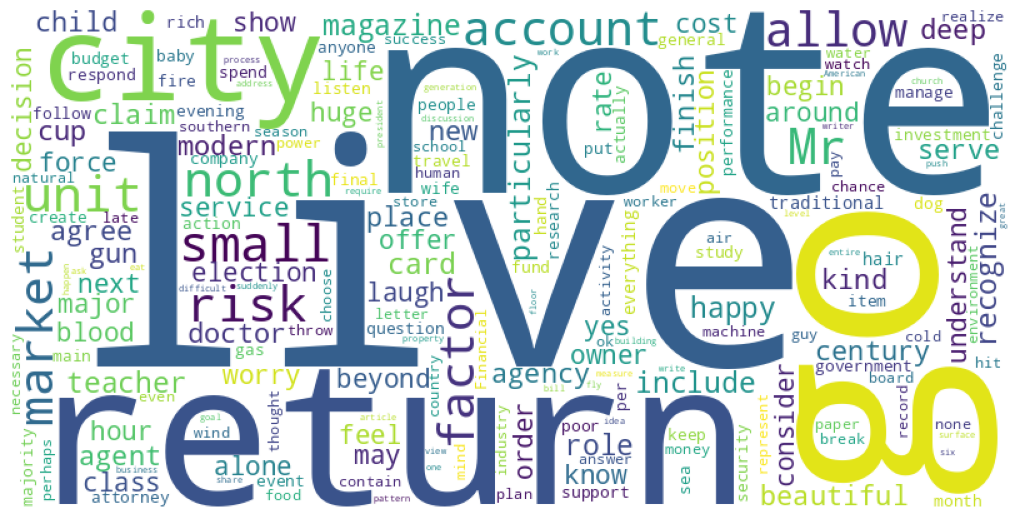

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'Feedback' is the column name containing the feedback text
feedback_text = ' '.join(df['Feedback'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from textblob import TextBlob

def analyze_feedback(feedback):
    analysis = TextBlob(feedback)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Assuming 'Feedback' is the column name containing the feedback text
df['Polarity'], df['Subjectivity'] = zip(*df['Feedback'].apply(analyze_feedback))

def label_feedback(row):
    if row['Polarity'] > 0 and row['Subjectivity'] > 0.5:
        return 'Positive & Subjective'
    elif row['Polarity'] > 0 and row['Subjectivity'] <= 0.5:
        return 'Positive & Objective'
    elif row['Polarity'] == 0 and row['Subjectivity'] > 0.5:
        return 'Neutral & Subjective'
    elif row['Polarity'] == 0 and row['Subjectivity'] <= 0.5:
        return 'Neutral & Objective'
    elif row['Polarity'] < 0 and row['Subjectivity'] > 0.5:
        return 'Negative & Subjective'
    else:
        return 'Negative & Objective'

# Create the 'Feedback_Label' column
df['Feedback_Label'] = df.apply(label_feedback, axis=1)

# Exclude 'Net Revenue Score' from columns_to_include
columns_to_include = [
    col for col in df.columns
    if col not in ['Outlier_IQR', 'Net_Revenue_Zscore', 'Outlier_Zscore', 'Outlier_SpiCy_Z', 'Z-Score', 'SciPy_Zscore', 'Net Revenue Score'] # Exclude 'Net Revenue Score' here
]
columns_to_include.append('Feedback_Label')

# Export to Excel
with pd.ExcelWriter('Final_work_Makinen.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df[columns_to_include].to_excel(writer, sheet_name='Textual', index=False)

print("Labeled rows exported to 'Final_work_Makinen.xlsx' sheet 'Textual'")

Labeled rows exported to 'Final_work_Makinen.xlsx' sheet 'Textual'


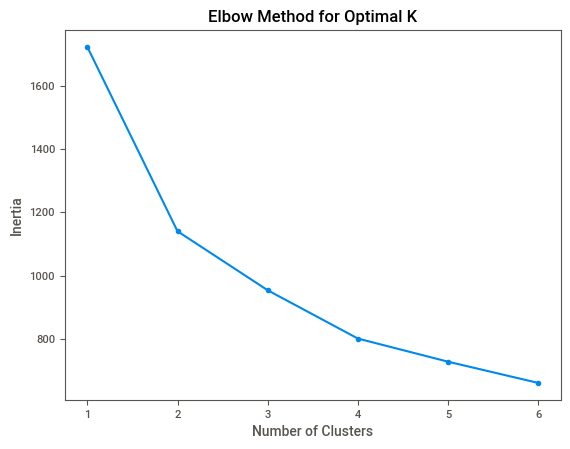

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


# Select only numerical columns for clustering
numerical_df = df.select_dtypes(include=np.number)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# Find the "elbow" point in the plot to determine the optimal number of clusters
# This is a visual inspection, so there might not be a clear elbow
# Choose the number of clusters where the inertia starts to decrease less significantly
# Change X in range based on the number of columns
# In this case, we will use the number of features (columns) for the upper limit
# You might want to experiment with other values, like 10, for a more detailed plot
X = numerical_df.shape[1] + 1  # +1 because range is exclusive of the upper bound

inertia = []
for i in range(1, X):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, X), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

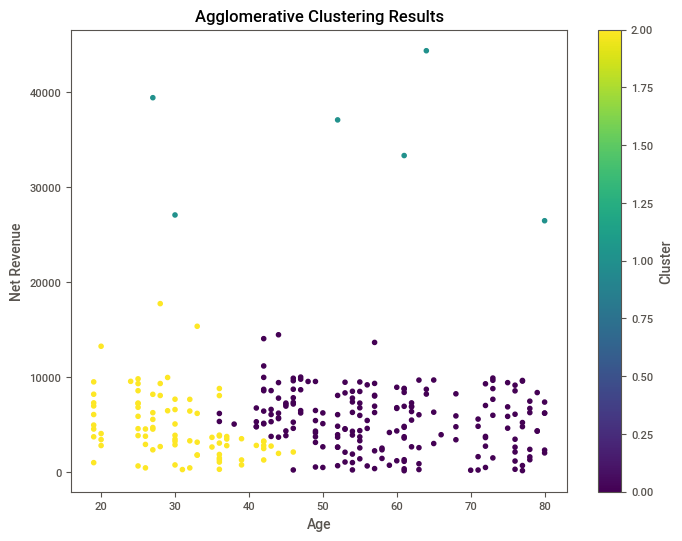

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Preparation:
# Select numerical features for clustering (you might need to adjust this)
numerical_features = ['Age', 'NetRevenue']
X = df[numerical_features]

# 2. Data Scaling:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Agglomerative Clustering:
# Create and fit the model
n_clusters = 3  # Choose the number of clusters (experiment with different values)
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(X_scaled)

# 4. Assign Cluster Labels:
df['Cluster'] = agg_clustering.labels_

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['NetRevenue'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Net Revenue')
plt.title('Agglomerative Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame with the 'Cluster' column

# Select the columns you want to export
columns_to_export = ['Name', 'City', 'Country', 'Sex', 'Age', 'Product', 'Feedback', 'NetRevenue', 'Date', 'Cluster']  # Include 'Cluster' column

# Create a new DataFrame with the selected columns
cluster_data = df[columns_to_export]

# Export to Excel
with pd.ExcelWriter('Final_work_Makinen.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    cluster_data.to_excel(writer, sheet_name='Clusters', index=False)

print("Cluster-based labeled rows exported to 'Final_work_Makinen.xlsx' sheet 'Clusters'")

Cluster-based labeled rows exported to 'Final_work_Makinen.xlsx' sheet 'Clusters'


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbxgvabt/brv1qgnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbxgvabt/h0e1eksn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44242', 'data', 'file=/tmp/tmppbxgvabt/brv1qgnn.json', 'init=/tmp/tmppbxgvabt/h0e1eksn.json', 'output', 'file=/tmp/tmppbxgvabt/prophet_modeladv__ude/prophet_model-20241022154744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


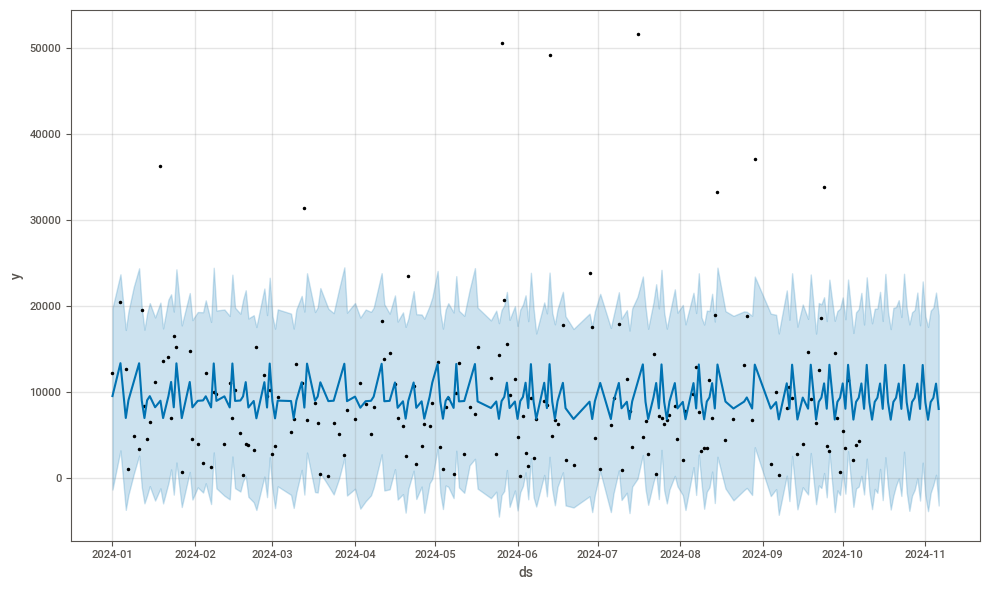

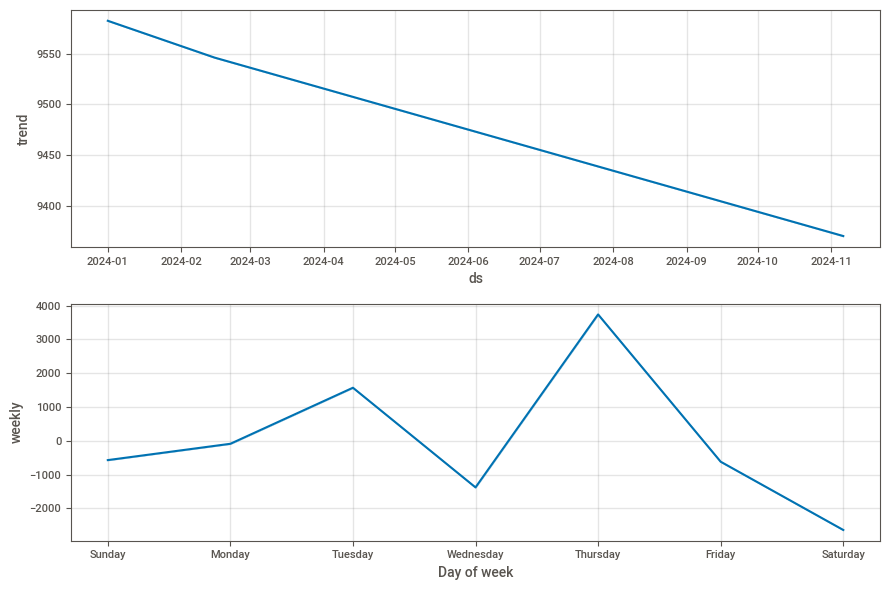

In [ ]:
!pip install prophet
import pandas as pd
from prophet import Prophet

# 1. Sum Net Revenues per date
daily_revenue = df.groupby('Date')['NetRevenue'].sum().reset_index()

# 2. Prepare data for Prophet
daily_revenue.columns = ['ds', 'y']  # Prophet requires columns named 'ds' (date) and 'y' (value)

# 3. Create and fit the Prophet model
model = Prophet()
model.fit(daily_revenue)

# 4. Create future dates for forecasting
future = model.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# 5. Make the forecast
forecast = model.predict(future)

# 6. Display the forecast
# Execute the code yourself to see the output
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # Display forecast, lower bound, and upper bound

# You can also plot the forecast:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [ ]:
!pip install prophet
import pandas as pd
from prophet import Prophet

# 1. Sum Net Revenues per date
daily_revenue = df.groupby('Date')['NetRevenue'].sum().reset_index()

# 2. Prepare data for Prophet
daily_revenue.columns = ['ds', 'y']  # Prophet requires columns named 'ds' (date) and 'y' (value)

# 3. Create and fit the Prophet model
model = Prophet()
model.fit(daily_revenue)

# 4. Create future dates for forecasting
future = model.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# 5. Make the forecast
forecast = model.predict(future)

# 6. Select and rename columns for export
forecast_data = forecast[['ds', 'yhat']]  # Select date and forecast columns
forecast_data.columns = ['Date', 'Forecasted NetRevenue']  # Rename columns

# 7. Export to Excel
with pd.ExcelWriter('Final_work_Makinen.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    forecast_data.to_excel(writer, sheet_name='Forecasting', index=False)

print("Summed NetRevenues per date and forecast exported to 'Final_work_Makinen.xlsx' sheet 'Forecasting'")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbxgvabt/t2tr6w5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppbxgvabt/62uvyp5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84744', 'data', 'file=/tmp/tmppbxgvabt/t2tr6w5l.json', 'init=/tmp/tmppbxgvabt/62uvyp5m.json', 'output', 'file=/tmp/tmppbxgvabt/prophet_modeluxo8tkh6/prophet_model-20241022154754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Summed NetRevenues per date and forecast exported to 'Final_work_Makinen.xlsx' sheet 'Forecasting'


In [ ]:
import pandas as pd
# Load the Excel file
df_unnorm = pd.read_excel('/content/Final_work_Makinen.xlsx')

# It seems there's a column named "Net Revenue", not "NetRevenue"
# Rename the "Net Revenue" column to "NetRevenue"
df_unnorm = df_unnorm.rename(columns={'Net Revenue': 'NetRevenue'})

# Check for duplicate rows in df_unnorm
duplicate_rows = df_unnorm[df_unnorm.duplicated()]
if df_unnorm.duplicated().any():
   print("DataFrame df_unnorm has duplicate rows.")
else:
 print("DataFrame df_unnorm does not have duplicate rows.")

 # Check for duplicate values within specific columns
for column in df_unnorm.columns:
 if df_unnorm.duplicated(subset=[column]).any():
  print(f"Column '{column}' has duplicate values.")

# Create separate dataframes for each entity to achieve 3NF
customers_df = df[['Name', 'City', 'Country', 'Sex', 'Age']].drop_duplicates().reset_index(drop=True)
products_df = df[['Product']].drop_duplicates().reset_index(drop=True)
transactions_df = df[['Name', 'Product', 'Feedback', 'NetRevenue', 'Date']]

# Add primary keys to each dataframe
customers_df['CustomerID'] = customers_df.index + 1
products_df['ProductID'] = products_df.index + 1

# Merge to create foreign keys in the transactions dataframe
transactions_df = transactions_df.merge(customers_df[['Name', 'CustomerID']], on='Name')
transactions_df = transactions_df.merge(products_df, on='Product')

# Drop original columns and reorder columns
transactions_df = transactions_df[['CustomerID', 'ProductID', 'Feedback', 'NetRevenue', 'Date']]

# Replace df_unnorm with df in these lines:
df['ProductID'] = pd.factorize(df['Product'])[0] + 1  # Use df instead of df_unnorm
df['CustomerID'] = pd.factorize(df['Name'])[0] + 1    # Use df instead of df_unnorm

# Use df for creating these DataFrames as well
customer_df = df[['CustomerID', 'Name', 'City', 'Country', 'Sex', 'Age']].drop_duplicates(subset=['CustomerID'])
product_df = df[['ProductID', 'Product']].drop_duplicates(subset=['ProductID'])
transaction_df = df[['CustomerID', 'ProductID', 'Feedback', 'Date', 'NetRevenue']]

# Assuming feedback_df is your DataFrame
# Group by 'CustomerID' and 'ProductID' and check if other columns have only one unique value
def are_other_columns_dependent(df):
 for col in df.columns:
  if col not in ['CustomerID', 'ProductID']:
   if df.groupby(['CustomerID', 'ProductID'])[col].nunique().max() > 1:
    return False
 return True
if are_other_columns_dependent(transaction_df):
 print("Other columns in transaction_df are fully dependent on the combination of CustomerID and ProductID.")
else:
 print("Other columns in transaction_df are not fully dependent on the combination of CustomerID and ProductID.")


# If you want to check for duplicates based on specific columns:
# For example, if you want to ensure that each customer only provides one feedback per product
if transaction_df.duplicated(subset=['CustomerID', 'ProductID']).any():
 print("feedback_df has duplicate rows based on CustomerID and ProductID.")
else:
 print("feedback_df does not have duplicate rows based on CustomerID and ProductID.")

# Store the DataFrame to an Excel file with a specific sheet name
# Replace Surname and Sheet
import pandas as pd
# ... (rest of your code) ...

# Store the DataFrame to an Excel file with a specific sheet name
# Replace Surname and Sheet
# Change mode='a' to mode='w' or if_sheet_exists='replace'
with pd.ExcelWriter('Final_work_Makinen.xlsx', mode='a', if_sheet_exists='replace') as writer: # Updated line
    customer_df.to_excel(writer, sheet_name='Customers', index=False)
    product_df.to_excel(writer, sheet_name='Products', index=False)
    transaction_df.to_excel(writer, sheet_name='Transactions', index=False)




DataFrame df_unnorm does not have duplicate rows.
Other columns in transaction_df are fully dependent on the combination of CustomerID and ProductID.
feedback_df does not have duplicate rows based on CustomerID and ProductID.
